In [1]:
# Importing the Necessary Libraries
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.layers import concatenate
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [2]:
# Connecting to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Defining the Training and Test Path
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'

In [ ]:
# Checking the Number of Folders/Classes (Normal and Pneumonia)
folders = glob('/content/drive/MyDrive/Dataset/train/*')
print(len(folders))

2


In [ ]:
# The Settings for Generating the Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [3]:
# The Settings for Generating the Test Set  
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [ ]:
# Generating the Training Set 
train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size=32,
                                                 class_mode = 'categorical')

Found 4686 images belonging to 2 classes.


In [8]:
# Generating the Test Set 
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=32,
                                            class_mode = 'categorical')

Found 1170 images belonging to 2 classes.


In [ ]:
# Defining the Input Shape
input_tensor=Input(shape=(224,224,3))

In [ ]:
base_model1 = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
# Extracting the Features
features1 = base_model1.output
for layer in base_model1.layers: 
  layer.trainable=True  # All layers are trainble

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Creating FC Layers
x = Flatten(name='flatten')(features1)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(len(folders), activation='softmax', name='predictions')(x)

In [ ]:
# Creating the Final Hybrid CNN Model
vgg16 = Model(inputs=input_tensor, outputs=x)

In [ ]:
# Setting the Weight Optimizer and Loss Function
sgd = optimizers.SGD()
vgg16.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
# Saving the Weight Parameters, When Achieving a Higher Test Accuracy
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/VGG16.h5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

# Training the Hybrid Model
vgg16_history=vgg16.fit(
    train_set,
  validation_data=test_set,
  epochs=20,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/20
147/147 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.7695
Epoch 1: val_accuracy improved from -inf to 0.86752, saving model to /content/drive/MyDrive/VGG16.h5
147/147 [==============================] - 184s 1s/step - loss: 0.4667 - accuracy: 0.7695 - val_loss: 0.2875 - val_accuracy: 0.8675
Epoch 2/20
147/147 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.9127
Epoch 2: val_accuracy improved from 0.86752 to 0.94615, saving model to /content/drive/MyDrive/VGG16.h5
147/147 [==============================] - 183s 1s/step - loss: 0.2236 - accuracy: 0.9127 - val_loss: 0.1319 - val_accuracy: 0.9462
Epoch 3/20
147/147 [==============================] - ETA: 0s - loss: 0.1578 - accuracy: 0.9407
Epoch 3: val_accuracy improved from 0.94615 to 0.95983, saving model to /content/drive/MyDrive/VGG16.h5
147/147 [==============================] - 183s 1s/step - loss: 0.1578 - accuracy: 0.9407 - val_loss: 0.1032 - val_accuracy: 0.9598
Epoch 4

In [ ]:
# Importing Model 2 (VGG19)
base_model2 = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
# Extracting the Features
features2 = base_model2.output
for layer in base_model2.layers: 
  layer.trainable=True  # All layers are trainble

In [ ]:
# Creating FC Layers
x = Flatten(name='flatten')(features2)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(len(folders), activation='softmax', name='predictions')(x)

In [ ]:
vgg19 = Model(inputs=input_tensor, outputs=x)

In [ ]:
vgg19.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
# Saving the Weight Parameters, When Achieving a Higher Test Accuracy
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/VGG19.h5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

# Training the Hybrid Model
vgg19_history=vgg19.fit(
    train_set,
  validation_data=test_set,
  epochs=20,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/20
147/147 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.7732
Epoch 1: val_accuracy improved from -inf to 0.91795, saving model to /content/drive/MyDrive/VGG19.h5
147/147 [==============================] - 139s 938ms/step - loss: 0.4835 - accuracy: 0.7732 - val_loss: 0.1962 - val_accuracy: 0.9179
Epoch 2/20
147/147 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9185
Epoch 2: val_accuracy improved from 0.91795 to 0.95214, saving model to /content/drive/MyDrive/VGG19.h5
147/147 [==============================] - 142s 962ms/step - loss: 0.2148 - accuracy: 0.9185 - val_loss: 0.1346 - val_accuracy: 0.9521
Epoch 3/20
147/147 [==============================] - ETA: 0s - loss: 0.1902 - accuracy: 0.9309
Epoch 3: val_accuracy did not improve from 0.95214
147/147 [==============================] - 138s 940ms/step - loss: 0.1902 - accuracy: 0.9309 - val_loss: 0.1377 - val_accuracy: 0.9402
Epoch 4/20
147/147 [==============================]

In [5]:
# Loading the Saved Model
network1 = load_model('/content/drive/MyDrive/VGG16.h5')
network2 = load_model('/content/drive/MyDrive/VGG19.h5')

In [9]:
# Classifying Using VGG16 and VGG19
pred_vgg16=network1.predict(test_set)
preds_vgg16=np.argmax(pred_vgg16, axis=1)
pred_vgg19=network2.predict(test_set)
preds_vgg19=np.argmax(pred_vgg19, axis=1)

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Pneumonia')]

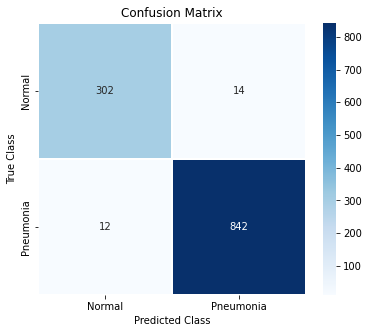

In [10]:
# Creating the Confusion Matrix of VGG16 network
cf_matrix=confusion_matrix(test_set.classes, preds_vgg16)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Pneumonia')]

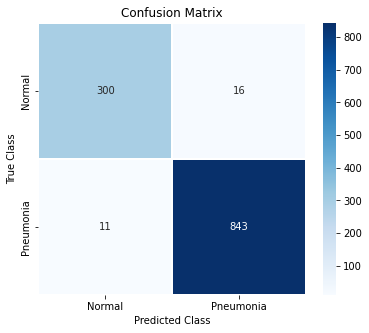

In [11]:
# Creating the Confusion Matrix of VGG19 network
cf_matrix=confusion_matrix(test_set.classes, preds_vgg19)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])

In [ ]:
# Calculating the Class Porbailities Using Both Networks
models = [network1, network2]
preds_1 = [model.predict(test_set) for model in models]
preds_1=np.array(preds_1)

In [ ]:
# Creating the Ensemble of VGG16 and VGG19 and Finding the Optimal Weights 
import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 10):
    for w2 in range(0,10):
                wts = [w1/10.,w2/10.]
                wted_preds1 = np.tensordot(preds_1, wts, axes=((0),(0)))
                wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
                weighted_accuracy = accuracy_score(test_set.classes, wted_ensemble_pred)
                df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                              'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[2], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1])    

Max accuracy of  98.11965811965811  obained with w1= 0.3  w2= 0.2


In [ ]:
# Classifying Using the Ensemble Model According to the Optimal Weights
models = [network1, network2]
preds = [model.predict(test_set) for model in models]
preds=np.array(preds_1)
preds=np.array(preds_1)
ideal_weights = [max_acc_row[0], max_acc_row[1]] 
#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(test_set.classes, ideal_weighted_ensemble_prediction)

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Pneumonia')]

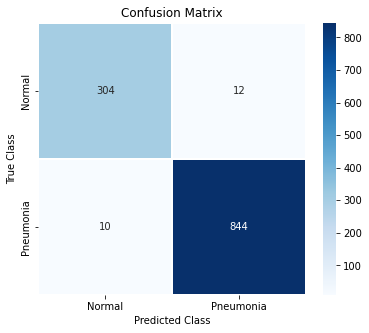

In [ ]:
# Creating the Confusion Matrix of The Ensemble Model
cf_matrix=confusion_matrix(test_set.classes, ideal_weighted_ensemble_prediction)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])